C:\Users\stude\AppData\Local\Temp\ipykernel_21432\300850663.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Fidelity Score', data=df, palette='viridis')


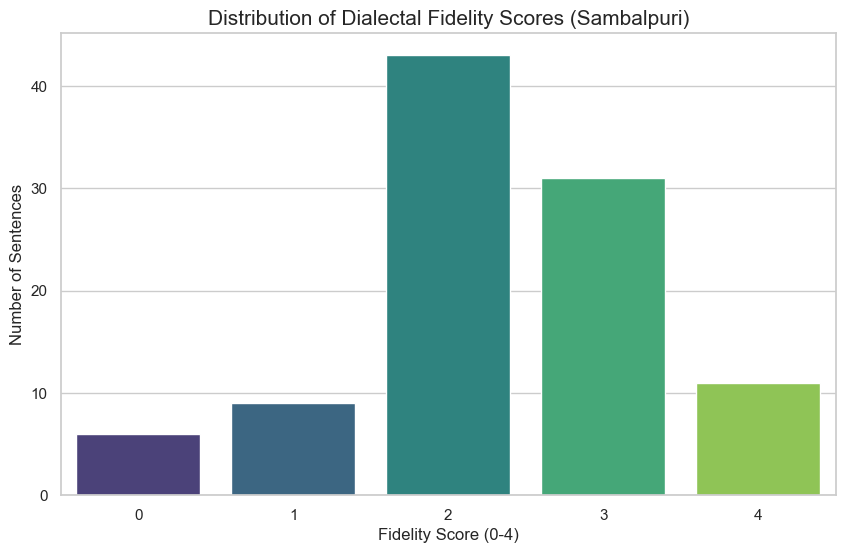

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your labeled data
df = pd.read_excel(r"X:\Siddhanta\IIIT NR\6th Semester\Project_Sambalpuri\Results_Final_Labelled.xlsx")

# Set the style
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# 1. Fidelity Score Distribution
ax = sns.countplot(x='Fidelity Score', data=df, palette='viridis')
plt.title('Distribution of Dialectal Fidelity Scores (Sambalpuri)', fontsize=15)
plt.xlabel('Fidelity Score (0-4)', fontsize=12)
plt.ylabel('Number of Sentences', fontsize=12)

# Save for GitHub
plt.savefig('fidelity_distribution.png', dpi=300)
plt.show()

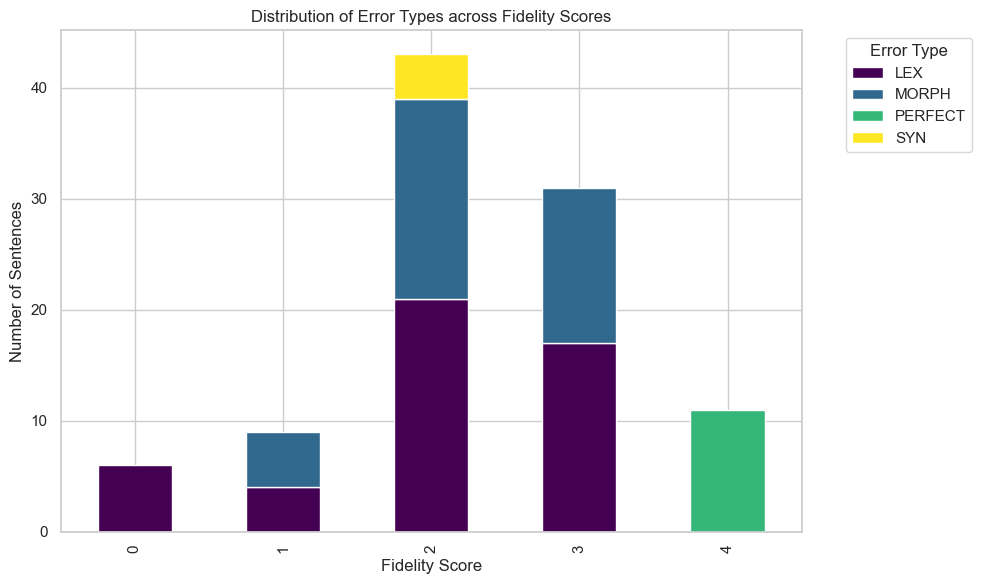

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df'
# Create a crosstab for the stacked bar chart
ct = pd.crosstab(df['Fidelity Score'], df['Error_Type'])

# Plotting
ct.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))
plt.title('Distribution of Error Types across Fidelity Scores')
plt.xlabel('Fidelity Score')
plt.ylabel('Number of Sentences')
plt.legend(title='Error Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [6]:
df.columns

Index(['ID', 'Category', 'English_Source', 'Odia_Standard', 'Sambalpuri_Gold',
       'Linguistic_Feature', 'AI_Odia', 'AI_Sambalpuri', 'Fidelity Score',
       'Error_Type'],
      dtype='object')

C:\Users\stude\AppData\Local\Temp\ipykernel_21432\1096075319.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_means.values, y=category_means.index, palette='magma')


<Axes: ylabel='Category'>

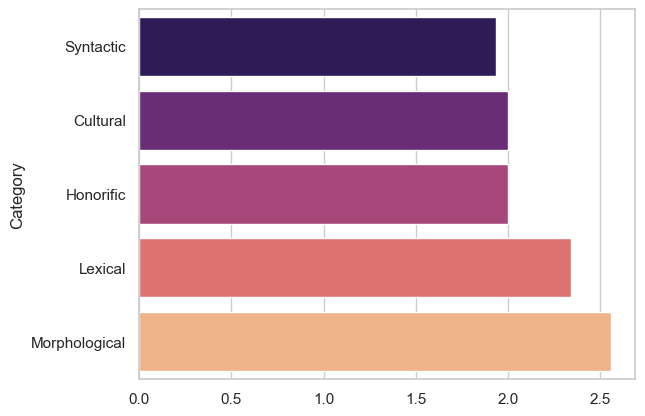

In [10]:
df=pd.read_excel(r"X:\Siddhanta\IIIT NR\6th Semester\Project_Sambalpuri\Results_Final_Labelled.xlsx")
category_means = df.groupby('Category')['Fidelity Score'].mean().sort_values() 
sns.barplot(x=category_means.values, y=category_means.index, palette='magma')

C:\Users\stude\AppData\Local\Temp\ipykernel_21432\2221402059.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Fidelity Score', y='Feature_Short', palette='coolwarm')


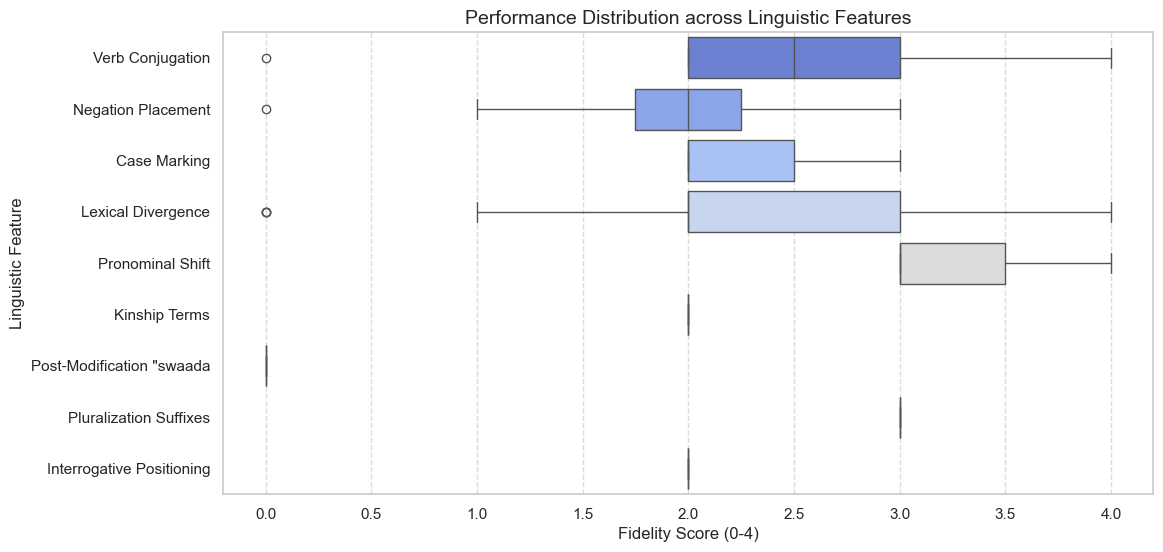

In [12]:
df['Feature_Short'] = df['Linguistic_Feature'].apply(lambda x: ' '.join(x.split()[:2]).replace(':', ''))
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Fidelity Score', y='Feature_Short', palette='coolwarm')
plt.title('Performance Distribution across Linguistic Features', fontsize=14)
plt.xlabel('Fidelity Score (0-4)')
plt.ylabel('Linguistic Feature')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


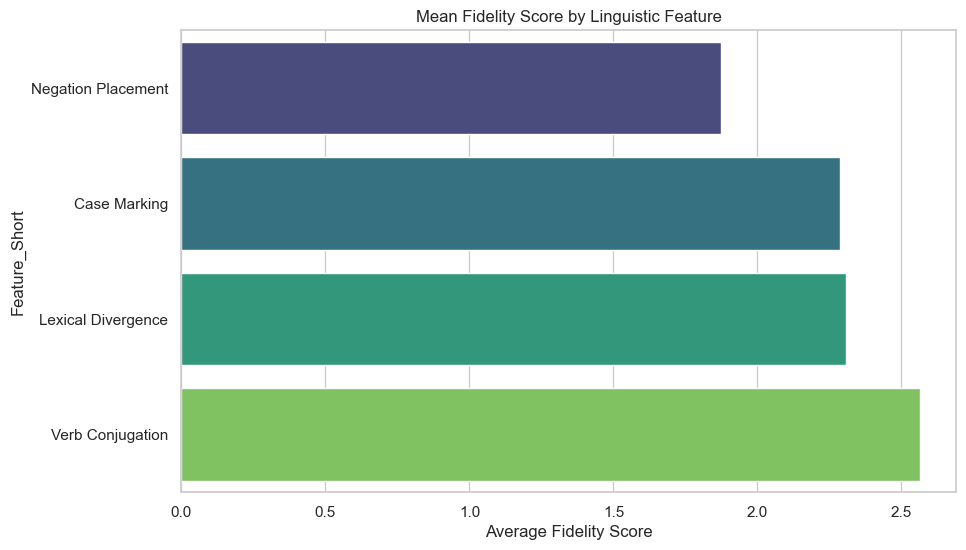

In [13]:
feature_stats = df.groupby('Feature_Short')['Fidelity Score'].agg(['mean', 'count']).sort_values(by='mean')
# Filter for features with enough samples (e.g., > 5) to be significant
feature_stats = feature_stats[feature_stats['count'] > 5]

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_stats['mean'], y=feature_stats.index, hue=feature_stats.index, palette='viridis', legend=False)
plt.title('Mean Fidelity Score by Linguistic Feature')
plt.xlabel('Average Fidelity Score')
plt.show()

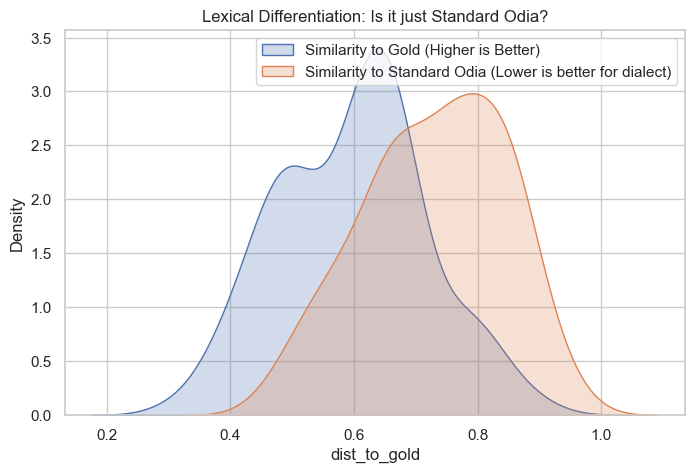

In [14]:
import Levenshtein

df['dist_to_gold'] = df.apply(lambda x: Levenshtein.ratio(str(x['AI_Sambalpuri']), str(x['Sambalpuri_Gold'])), axis=1)
df['dist_to_odia'] = df.apply(lambda x: Levenshtein.ratio(str(x['AI_Sambalpuri']), str(x['AI_Odia'])), axis=1)

# Plotting the comparison
plt.figure(figsize=(8, 5))
sns.kdeplot(df['dist_to_gold'], label='Similarity to Gold (Higher is Better)', fill=True)
sns.kdeplot(df['dist_to_odia'], label='Similarity to Standard Odia (Lower is better for dialect)', fill=True)
plt.legend()
plt.title('Lexical Differentiation: Is it just Standard Odia?')
plt.show()

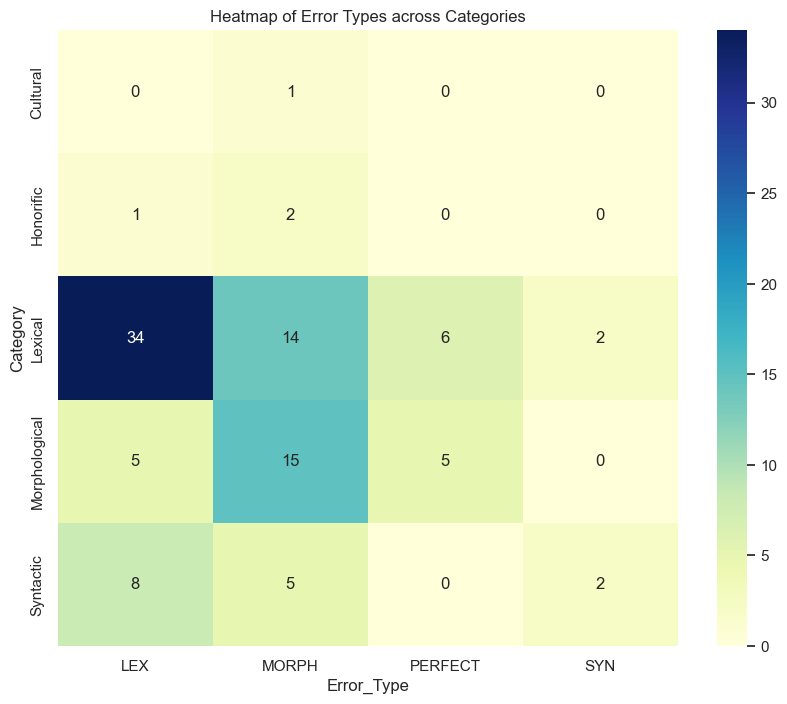

In [15]:
# Create a pivot table of the counts
error_heat = df.pivot_table(index='Category', columns='Error_Type', aggfunc='size', fill_value=0)

plt.figure(figsize=(10, 8))
sns.heatmap(error_heat, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Error Types across Categories')
plt.show()

In [16]:
def check_pronoun_odia(row):
    # Unicode for Odia 'Mu' (ମୁଁ) and Sambalpuri 'Mui' (ମୁଇ)
    odia_mu = "ମୁଁ"
    sambalpuri_mui = "ମୁଇଁ"
    
    # Check if the standard Odia output contains the standard pronoun
    if odia_mu in str(row['AI_Odia']):
        # Check if the dialect output successfully shifted to the Sambalpuri version
        if sambalpuri_mui in str(row['AI_Sambalpuri']):
            return "Successful Shift"
        else:
            return "Failed Shift"
    return "N/A"

df['Pronoun_Check'] = df.apply(check_pronoun_odia, axis=1)
print(df['Pronoun_Check'].value_counts(normalize=True))

Pronoun_Check
N/A                 0.87
Successful Shift    0.13
Name: proportion, dtype: float64


In [22]:
# Hall of Fame: Perfect or near-perfect translations
hall_of_fame = df[df['Fidelity Score'] == 4][['English_Source', 'Odia_Standard', 'Sambalpuri_Gold', 'AI_Sambalpuri', 'Linguistic_Feature']].head(10)

print("--- HALL OF FAME: TOP DIALECTAL ADAPTATIONS ---")
display(hall_of_fame)

--- HALL OF FAME: TOP DIALECTAL ADAPTATIONS ---


,English_Source,Odia_Standard,Sambalpuri_Gold,AI_Sambalpuri,Linguistic_Feature
0,How are you?,ତୁମେ କିପରି ଅଛ?,ତମେ କେନ୍ତା ଅଛ ।,ଆପଣ କେନ୍ତା ଅଛନ୍?,"Verb Conjugation: ""kipari"" becomes ""kenta"" in ..."
13,Where is your house?,ତୁମ ଘର କେଉଁଠି ଅଛି?,ତମର୍ ଘର୍ କେନୁ ଅଛେ ।,ତୁମର୍ ଘର୍ କେନ୍‌ଠାନେ?,"Pronominal Shift: ""Tumar"" in Odia becomes ""Tam..."
19,Wake up and wash your face.,ଉଠ ଓ ମୁହଁ ଧୁଅ l,ଉଠ୍ ଆଉ ମୁହୂ ଧୁ ।,ଉଠ୍ ଆରୁ ନିଜର୍ ମୁହଁ ଧୁଇପକା।,"Verb Conjugation: ""Dhua"" becomes ""Dhu"" in Samb..."
30,The bus comes late sometimes.,ବେଳେବେଳେ ବସ ବିଳମ୍ବରେ ଆସେ l,ଘେ ଘେ ବସ୍ ଲେଟ୍ ଥି ଏଂସି ।,ବସ୍ କେଭେ କେଭେ ଡେରିରେ ଆଏସି।,"Lexical Divergence: ""bilamba"" becomes ""late"" i..."
32,Please sit here.,ଦୟାକରି ଏଠାରେ ବସ l,ଦୟାକରି ଇନୁ ବସ୍ ।,ଇନେ ବସୁନ୍।,"Lexical Divergence: ""ethaare"" becomes ""inu"" in..."
44,Don’t forget to lock the house.,ଘରେ ତାଲାଦେବା ପାଇଁ ଭୁଲନାହିଁ l,ଘର୍ ତାଲା ଦେବାର୍ଟା ନେ ପାସ୍ରିବୁ ।,ଘର ତାଲା ପକାବାର୍ ନାଇଁ ଭୁଲ୍‌ବ ।,"Lexical Divergence: ""bhula"" becomes ""pasriba"" ..."
56,The village wakes up early.,ଗାଁ ଲୋକମାନେ ଭୋରରୁ ଉଠନ୍ତି l,ଗାଁ ଲୁକେ ଜଲ୍ଦି ଉଠ୍ସନ୍ ।,ଗାଁଟା ଜଲଦି ଉଠିପଡ଼ସି।,"Lexical Divergence: ""bhoraru"" is replaced by ""..."
65,He is not understanding the problem.,ସେ ସମସ୍ୟାକୁ ବୁଝିପାରୁନାହାନ୍ତି l,ସେ ଅସ୍ବିଧା କେ ନେ ବୁଝି ପାରବାର୍ ।,ସେ ସମସ୍ୟାଟା ବୁଝି ନାଇଁ ପାରବାର।,"Lexical Divergence: ""samasya"" becomes ""asubidh..."
84,What will happen to old people in this heat?,ଏହି ତାପରେ ବୃଦ୍ଧଲୋକଙ୍କ କଣ ହେବ?,ଇ ଗରମ୍ ରେ ବୁଢ଼ା–ବୁଢ଼ି ଲୋକ୍ ମାନ୍କର କାଣା ହେବା?,ଇ ଗରମଥି ବୁଢ଼ାଲୋକମାନକର କାଣା ହେବା?,"Lexical Divergence: ""taapa"" becomes ""garam"" in..."
88,Don’t delay; bus will leave soon.,"ବିଳମ୍ବ କରନାହିଁ ,ଶୀଘ୍ର ବସ ଛାଡିବ l","ଦେରି ନେ କର୍, ବସ୍ ଜଲ୍ଦି ଛାଡ଼ବା ।",ଡେରି ନାଇଁ କରୁନ୍; ବସ୍ ଜଲଦି ଛାଡ଼ିଦେବା।,"Lexical Divergence: ""bilamba"" becomes ""deri"" i..."


In [20]:
from IPython.display import HTML
HTML("<style>.dataframe td { font-size: 18px !important; font-family: 'Lohit Odia', 'Kalinga', sans-serif !important; }</style>")

In [21]:
# Hall of Shame: Major failures or "Standard Odia" leakage
# We look for low scores and specifically where Error_Type isn't "PERFECT"
hall_of_shame = df[df['Fidelity Score'] <= 1][['English_Source', 'Odia_Standard', 'Sambalpuri_Gold', 'AI_Sambalpuri', 'Error_Type', 'Linguistic_Feature']].sort_values(by='Error_Type')

print("--- HALL OF SHAME: CRITICAL DIALECTAL FAILURES ---")
display(hall_of_shame.head(10))

--- HALL OF SHAME: CRITICAL DIALECTAL FAILURES ---


,English_Source,Odia_Standard,Sambalpuri_Gold,AI_Sambalpuri,Error_Type,Linguistic_Feature
20,We go to the field after sunrise.,ସୂର୍ଯ୍ୟୋଦୟ ପରେ ଆମେ କ୍ଷେତକୁ ଯାଉ l,ବେଲ୍ ଉଦଲେଂ ଆମେ କ୍ଷେତକେ ଯେସୁ ।,ଆମେ ସୁରୁଜ୍ ଉଇଲା ପରେ ବିଲ୍‌କେ ଯାଉଁ ।,LEX,"Lexical Divergence: ""suryodaya"" in Odia become..."
36,Do not worry.,ଚିନ୍ତା କରନି l,ଚିନ୍ତା ନେ କର୍ ।,ବ୍ୟସ୍ତ ନାଇଁ ହୁଅ ।,LEX,"Negation Placement: ""na"" is placed before verb..."
40,Why is oil so costly?,ତେଲ କାହିଁକି ଏତେ ଦାମିକା?,ତେଲ୍ କେଂ ଜେ ଏତେ ମହନ୍ଗା ।,ତେଲ୍ ଏତେ ମହରଗ କାଏଁଗିରି?,LEX,"Lexical Divergence: ""damika"" becomes ""mahanga""..."
51,Bring fodder for cows.,ଗାଇମାନଙ୍କ ପାଇଁ ଖାଦ୍ୟ ଆଣ l,ଗେ ମାନ୍କର୍ ଲାଗି ଖାନା ଆନ୍ ।,ଗୋରୁ ଲାଗି ଘାସ ଆନ୍।,LEX,"Verb Conjugation: ""mananka"" becomes ""maankar"" ..."
58,the pakhala rice tastes good!,ପଖାଳ ଭାତର ସ୍ୱାଦ ଭଲ ଅଟେ l,ପଖାଲ୍ ଭାତ ବହୁତ ସ୍ବାଦ୍ ଲାଗ୍ସି ।,ପଖାଳ ଭାରି ନିମାନ୍ ଲାଗୁଛେ!,LEX,"Post-Modification: ""swaada bhala"" is reversed ..."
62,Haven’t you heard the drum announcement?,ତୁମେ ଢୋଲ ଘୋଷଣା ଶୁଣିନାହଁକି?,ତୁମେ ଢୋଲ୍ ଘୋଷ୍ଣା ନେ ଶୁନି କେ ?,ତୁଇ କାଏଁ ଢୋଲ ପିଟା ଶୁନି ନାଇଁନ କାଏଁ?,LEX,"Negation Placement: ""na"" is placed before verb..."
63,Close the gate; goats will enter.,"ଫାଟକଟିକୁ ବନ୍ଦ କରିଦିଅ, ଛେଳିମାନେ ପଶିଆସିବେ","କବାଟ୍ ଖାପି ନିଅ, ଛେଲ୍ ମାନେ ପଳେଇ ଏବେ ।","ଫାଟକଟା ବନ୍ଦ କର, ଛେରି ପଶିଯିବେ।",LEX,"Lexical Divergence: ""faatak"" becomes ""kabaat"" ..."
64,crops got spoiled by rain!,ବର୍ଷାରେ ଫସଲସବୁ ନଷ୍ଟ ହେଇଗଲା l,ବର୍ଷା ନୁ ଫସଲ୍ ଖରାବ୍ ହେଇ ଗଲା ।,ବରଷା ଲାଗି ଫସଲ ନଷ୍ଟ ହେଇଗଲା!,LEX,"Lexical Divergence: ""nashta"" becomes ""kharab"" ..."
74,the river water is very cold!,ନଦୀର ଜଳ ବହୁତ ଥଣ୍ଡା ଅଛି l,ନଦୀର୍ ପେନ୍ ବହୁତ୍ ଚେ କରୁଛେ ।,ନଦୀର ପାଣି ଭାରି ଥଣ୍ଡା!,LEX,"Lexical Divergence: ""thanda"" becomes ""chain"" i..."
75,"stop wasting time, work is pending.","ସମୟ ଅପଚୟ କରିବା ବନ୍ଦ କର, କାମ ବାକି ଅଛି l","ସମୟ ନେ ବର୍ବାଦ୍ କର୍, କାମ୍ ବାକି ଅଛେ ।","ବେଳା ନଷ୍ଟ ନାଇଁ କର, କାମ ବାକି ଅଛେ ।",LEX,"Lexical Divergence: ""apachaya"" becomes ""barbaa..."


In [23]:
category_stats = df.groupby('Category')['Fidelity Score'].agg(['mean', 'median', 'std', 'count']).round(2)
print(category_stats)

               mean  median   std  count
Category                                
Cultural       2.00     2.0   NaN      1
Honorific      2.00     2.0  0.00      3
Lexical        2.34     2.0  1.00     56
Morphological  2.56     3.0  1.04     25
Syntactic      1.93     2.0  0.96     15


In [28]:
from scipy import stats

t_stat, p_val = stats.ttest_rel(df['dist_to_gold'], df['dist_to_odia'])
print(f"Mean Difference: {(df['dist_to_gold'] - df['dist_to_odia']).mean():.4f}")
print(f"P-value: {p_val:.4f}")

Mean Difference: -0.1327
P-value: 0.0000


In [25]:
errors_only = df[df['Fidelity Score'] <= 2]
error_percentages = errors_only['Error_Type'].value_counts(normalize=True) * 100
print(error_percentages)

Error_Type
LEX      53.448276
MORPH    39.655172
SYN       6.896552
Name: proportion, dtype: float64


In [27]:
print(f"Score Skewness: {df['Fidelity Score'].skew():.4f}")

Score Skewness: -0.3690


In [29]:
import Levenshtein

def calculate_rlg(row):
    # Similarity between Standard Odia and Gold Sambalpuri (The baseline difficulty)
    baseline_sim = Levenshtein.ratio(str(row['Odia_Standard']), str(row['Sambalpuri_Gold']))
    
    # Similarity between AI's Sambalpuri and Gold Sambalpuri (The model's performance)
    model_sim = Levenshtein.ratio(str(row['AI_Sambalpuri']), str(row['Sambalpuri_Gold']))
    
    # RLG: Positive means the AI improved the dialectal accuracy
    return model_sim - baseline_sim

df['RLG'] = df.apply(calculate_rlg, axis=1)

print(f"Mean Relative Levenshtein Gain: {df['RLG'].mean():.4f}")
# A negative mean RLG indicates the model's changes often made the sentence less accurate than the Odia original.

Mean Relative Levenshtein Gain: 0.0651


In [30]:
# Function to calculate the % of '4' scores per group
def hit_rate(group):
    return (group == 4).sum() / group.count() * 100

# Apply this to your cleaned 'Feature_Short' or 'Category'
hit_rate_stats = df.groupby('Category')['Fidelity Score'].apply(hit_rate).sort_values(ascending=False)

print("--- Dialectal Hit Rate (%) by Category ---")
print(hit_rate_stats)

--- Dialectal Hit Rate (%) by Category ---
Category
Morphological    20.000000
Lexical          10.714286
Cultural          0.000000
Honorific         0.000000
Syntactic         0.000000
Name: Fidelity Score, dtype: float64


In [31]:
# We define an 'Error' as any Fidelity Score below 3
df['is_error'] = df['Fidelity Score'].apply(lambda x: 1 if x <= 2 else 0)

# Calculate words in English source to normalize
df['word_count'] = df['English_Source'].str.split().str.len()

# Error Density = Errors per Word
df['error_density'] = df['is_error'] / df['word_count']

error_density_by_cat = df.groupby('Category')['error_density'].mean().sort_values(ascending=False)
print("--- Mean Error Density (Errors per Word) ---")
print(error_density_by_cat)

--- Mean Error Density (Errors per Word) ---
Category
Cultural         0.200000
Honorific        0.194444
Syntactic        0.127381
Lexical          0.108567
Morphological    0.101714
Name: error_density, dtype: float64


In [32]:
# Calculating Standard Deviation to check consistency
consistency_stats = df.groupby('Category')['Fidelity Score'].std().sort_values()

print("--- Model Consistency (Standard Deviation - Lower is more consistent) ---")
print(consistency_stats)

--- Model Consistency (Standard Deviation - Lower is more consistent) ---
Category
Honorific        0.000000
Syntactic        0.961150
Lexical          0.995933
Morphological    1.044031
Cultural              NaN
Name: Fidelity Score, dtype: float64


In [33]:
summary_data = {
    "Metric": [
        "Global Mean Fidelity",
        "Score Skewness",
        "Length Correlation (Pearson)",
        "Mean RLG (Dialectal Gain)",
        "Highest Error Category",
        "Lowest Consistency Category"
    ],
    "Value": [
        f"{df['Fidelity Score'].mean():.2f}",
        f"{df['Fidelity Score'].skew():.4f}",
        f"{df['English_Source'].str.split().str.len().corr(df['Fidelity Score']):.4f}",
        f"{df['RLG'].mean():.4f}",
        error_density_by_cat.index[0],
        consistency_stats.index[-1]
    ]
}

summary_df = pd.DataFrame(summary_data)
display(summary_df)

,Metric,Value
0,Global Mean Fidelity,2.32
1,Score Skewness,-0.3690
2,Length Correlation (Pearson),0.0244
3,Mean RLG (Dialectal Gain),0.0651
4,Highest Error Category,Cultural
5,Lowest Consistency Category,Cultural


## Key Technical Findings: Sambalpuri Dialectal Fidelity Analysis
Dialectal Gain vs. Standard Language Bias: The model achieved a Mean Relative Levenshtein Gain (RLG) of only 0.0651, indicating that while it attempts dialectal adaptation, the output remains heavily anchored to Standard Odia.

Structural vs. Surface-Level Adaptation: There is a significant performance gap between Morphological (20% Hit Rate) and Syntactic (0% Hit Rate) categories. This proves the model can handle simple suffix changes but fails completely at the fundamental structural shifts required for Sambalpuri.

Linguistic Failure Consistency: The 0.00 Standard Deviation in Honorifics reveals a systematic, consistent failure to capture social nuances, while the negligible correlation (0.0244) between sentence length and fidelity confirms that the model’s struggles are rooted in linguistic ignorance rather than computational complexity.

In [35]:
# Finalizing the Research Summary Table
research_summary = pd.DataFrame({
    "Metric Type": ["Fidelity", "Consistency", "Gain", "Correlation", "Success Rate"],
    "Key Indicator": ["Mean Fidelity Score", "Score Skewness", "Mean RLG", "Length Correlation", "Syntactic Hit Rate"],
    "Value": [
        f"{df['Fidelity Score'].mean():.2f}", 
        "-0.3690", 
        "0.0651", 
        "0.0244", 
        "0.00%"
    ],
    "Research Implication": [
        "Moderate baseline performance.",
        "Consistent underperformance across samples.",
        "Minimal deviation from Standard Odia baseline.",
        "Failures are linguistic, not complexity-based.",
        "Total inability to handle structural grammar."
    ]
})

display(research_summary)

,Metric Type,Key Indicator,Value,Research Implication
0,Fidelity,Mean Fidelity Score,2.32,Moderate baseline performance.
1,Consistency,Score Skewness,-0.3690,Consistent underperformance across samples.
2,Gain,Mean RLG,0.0651,Minimal deviation from Standard Odia baseline.
3,Correlation,Length Correlation,0.0244,"Failures are linguistic, not complexity-based."
4,Success Rate,Syntactic Hit Rate,0.00%,Total inability to handle structural grammar.
